In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# [Problem 1] Understanding the content of the competition

**What kind of company is Home Credit?**
Home Credit B.V. is an international non-bank financial institution founded in 1997 in the Czech Republic and headquartered in Netherlands, known for providing a positive and safe borrowing experience for the unbanked population.
<br>
**What is expected in this competition?**
In this competition, we have to deal with predicitng the client's repayment abilities using various alternative data.
<br>
**What are the benefits companies can gain by predicting this?**
After having predicted the client's repayment abilities, Home Credit could unlock the full potential of their data, which ensure that clients capable of repayment of not rejected and that loans are given with some rules that could empower their clients to be successful, thus gaining more revenue and customers.

In [2]:
df = pd.read_csv('application_train.csv')

# [Problem 2] Understanding the overview of data

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


From these first 5 rows, we could see that our target variable is 'TARGET' (too obviously). Besides the information of the clients, there also many data that have been normalized, which are those with the following keywork in its name: [MODE, MEDI, AVG]

In [4]:
df.info

<bound method DataFrame.info of         SK_ID_CURR  ...  AMT_REQ_CREDIT_BUREAU_YEAR
0           100002  ...                         1.0
1           100003  ...                         0.0
2           100004  ...                         0.0
3           100006  ...                         NaN
4           100007  ...                         0.0
...            ...  ...                         ...
307506      456251  ...                         NaN
307507      456252  ...                         NaN
307508      456253  ...                         1.0
307509      456254  ...                         0.0
307510      456255  ...                         1.0

[307511 rows x 122 columns]>

By running the info command, we obtains the following information about the training data: 


*   Total 307511 rows, 122 columns
*  Types of these data are float, int and object



In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

According to the table, we observe that there are many data columns that are in binary form (FLAG_xxx_yyy, TARGET,.. ).

**Checking for missing values**

In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
...,...,...
REG_CITY_NOT_LIVE_CITY,0,0.000000
LIVE_REGION_NOT_WORK_REGION,0,0.000000
REG_REGION_NOT_WORK_REGION,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


# [Problem 3] Defining issues



*   Distribution of data and data statistic
*   Compare data with target variable





# [Problem 4] Data exploration

In [7]:
# plotting functions for statistic and distribution based on target variable

def plot_dist(feature):
    t1 = df.loc[df['TARGET'] == 1]
    t0 = df.loc[df['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()

    sns.kdeplot(t1[feature], label='TARGET = 1')
    sns.kdeplot(t0[feature], label='TARGET = 0')
    sns.distplot(df[feature].dropna())
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)   

    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)    
    plt.legend() 
    plt.show()

def plot_stat(feature, label_rotation=False):
    tmp = df[feature].value_counts()
    ft = pd.DataFrame({feature: tmp.index, 'Number of contracts': tmp.values})
    print(ft)

    # percentage calculation
    perc = df[[feature, 'TARGET']].groupby([feature], as_index=False).mean()
    perc.sort_values(by='TARGET', ascending=False, inplace=True)

    fig, axs = plt.subplots(ncols=2, figsize=(16, 10))
    sns.set_color_codes('pastel')
    s = sns.barplot(ax=axs[0], x=feature, y='Number of contracts', data=ft)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)


    s = sns.barplot(ax=axs[1], x=feature, y='TARGET', order=perc[feature], data=perc)
    plt.ylabel("Percent of target = 1", fontsize=10)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.show()

**Target variable distribution**

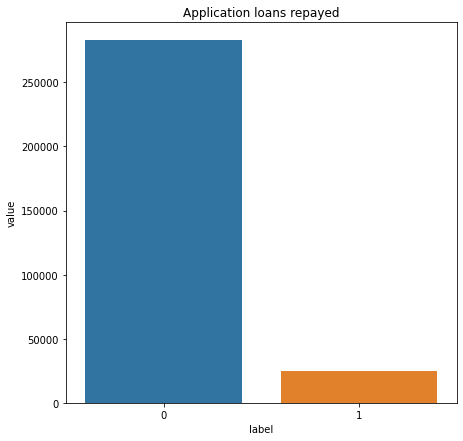

In [8]:
temp = df['TARGET'].value_counts()
target = pd.DataFrame({'label': temp.index, 'value': temp.values})

plt.figure(figsize=(7, 7))
plt.title('Application loans repayed')
sns.set_color_codes('pastel')
sns.barplot(x='label', y='value', data=target)
locs, labels = plt.xticks()
plt.show()

Number of clients that have not repayed is obviously more significant than that of repayed.

**Statistic of 'NAME_CONTRACT_TYPE**

  NAME_CONTRACT_TYPE  Number of contracts
0         Cash loans               278232
1    Revolving loans                29279


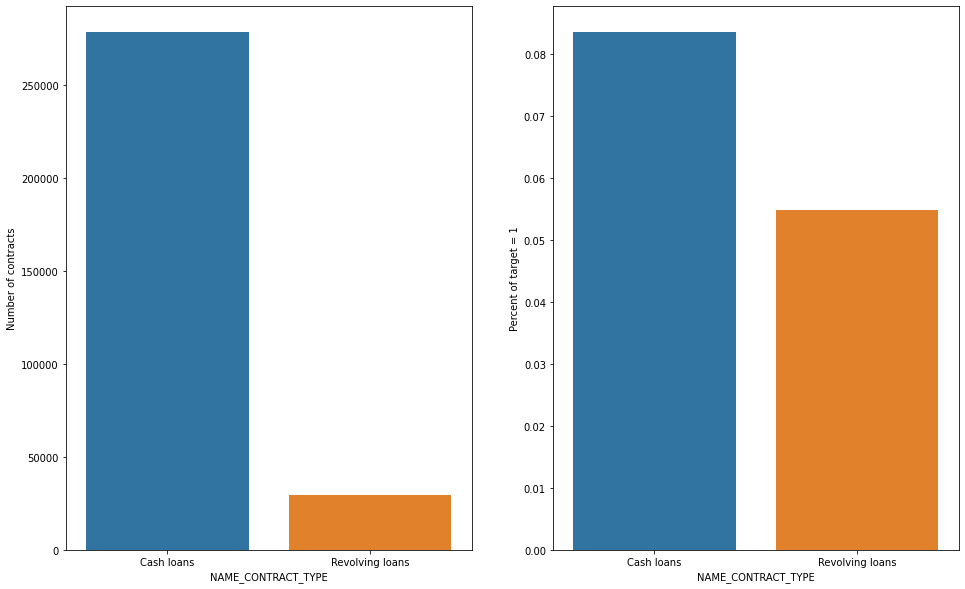

In [9]:
plot_stat('NAME_CONTRACT_TYPE')

According from these figures, contract type of cash loasn took the larger portion of the total, and it also has the higher rate of not being repaid.

**Client gender**

  CODE_GENDER  Number of contracts
0           F               202448
1           M               105059
2         XNA                    4


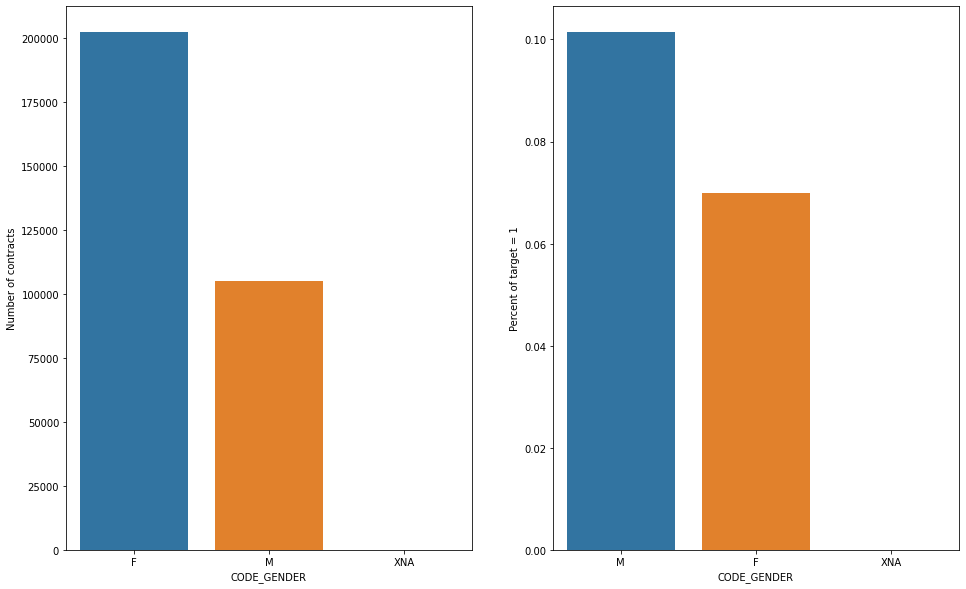

In [10]:
plot_stat('CODE_GENDER')

While female clients nearly double the total of male clients, male clients tend to not repaid more frequently than that of female.

**Flag own car**

  FLAG_OWN_CAR  Number of contracts
0            N               202924
1            Y               104587


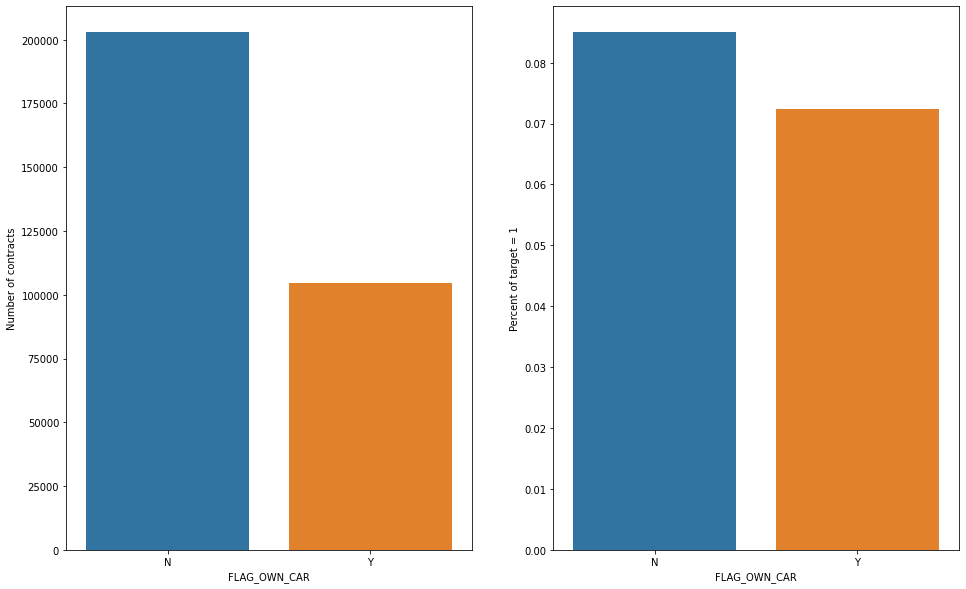

In [11]:
plot_stat('FLAG_OWN_CAR')

The same trend of client gender could be seen in the number of clients who own car. However, those who possesses car has a higher rate to repay loans than those who does not.

**Flag own real estate**

  FLAG_OWN_REALTY  Number of contracts
0               Y               213312
1               N                94199


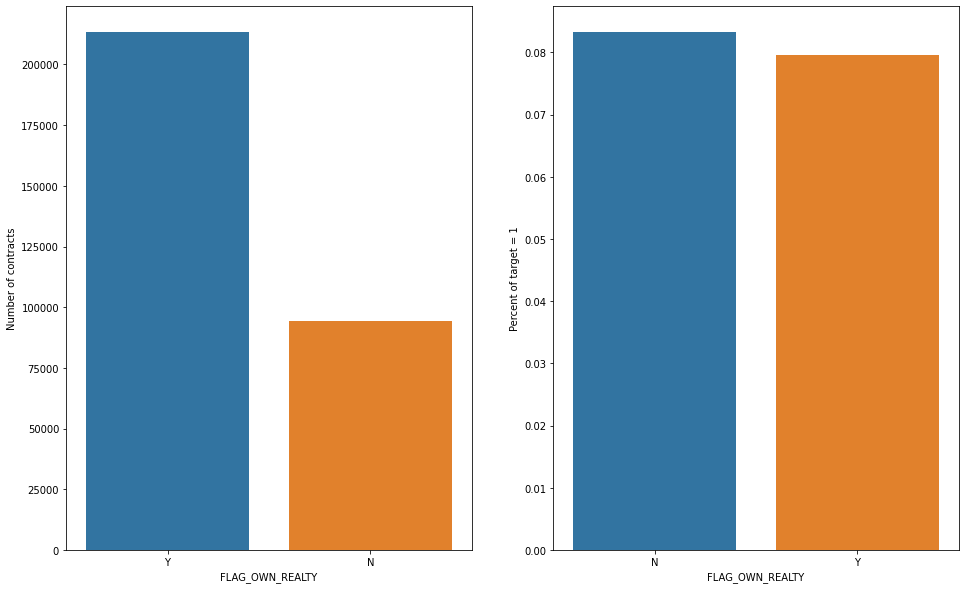

In [12]:
plot_stat('FLAG_OWN_REALTY')

The amount of clients who owns real estate properties has a higher chance of repaying their loans, while those who not shows the opposite.

**Family status of client**

     NAME_FAMILY_STATUS  Number of contracts
0               Married               196432
1  Single / not married                45444
2        Civil marriage                29775
3             Separated                19770
4                 Widow                16088
5               Unknown                    2


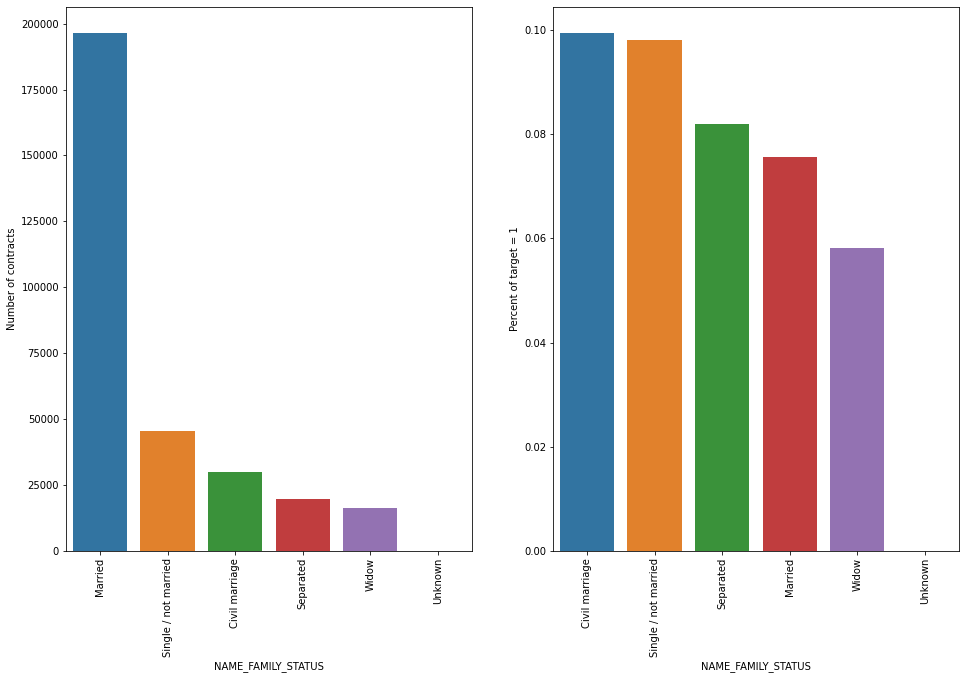

In [13]:
plot_stat('NAME_FAMILY_STATUS', True)

Most of the clients are married, and this family status category also has a higher rate of not repaying loans.

**Number of children**

    CNT_CHILDREN  Number of contracts
0              0               215371
1              1                61119
2              2                26749
3              3                 3717
4              4                  429
5              5                   84
6              6                   21
7              7                    7
8             14                    3
9             19                    2
10            12                    2
11            10                    2
12             9                    2
13             8                    2
14            11                    1


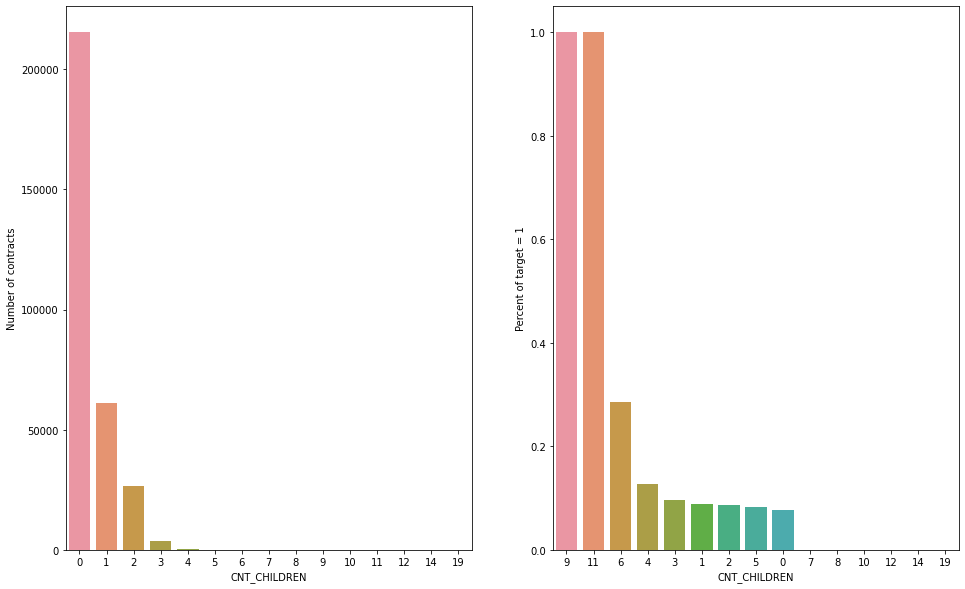

In [14]:
plot_stat('CNT_CHILDREN')

The majority of clients do not have any children.<br>
In family of 0 to 6 children, the rate of repayment is quite considerable. However, family with more than 6, the chance of them repaying the loans are 0.

**Number of family members of client**

    CNT_FAM_MEMBERS  Number of contracts
0               2.0               158357
1               1.0                67847
2               3.0                52601
3               4.0                24697
4               5.0                 3478
5               6.0                  408
6               7.0                   81
7               8.0                   20
8               9.0                    6
9              10.0                    3
10             14.0                    2
11             16.0                    2
12             12.0                    2
13             20.0                    2
14             11.0                    1
15             13.0                    1
16             15.0                    1


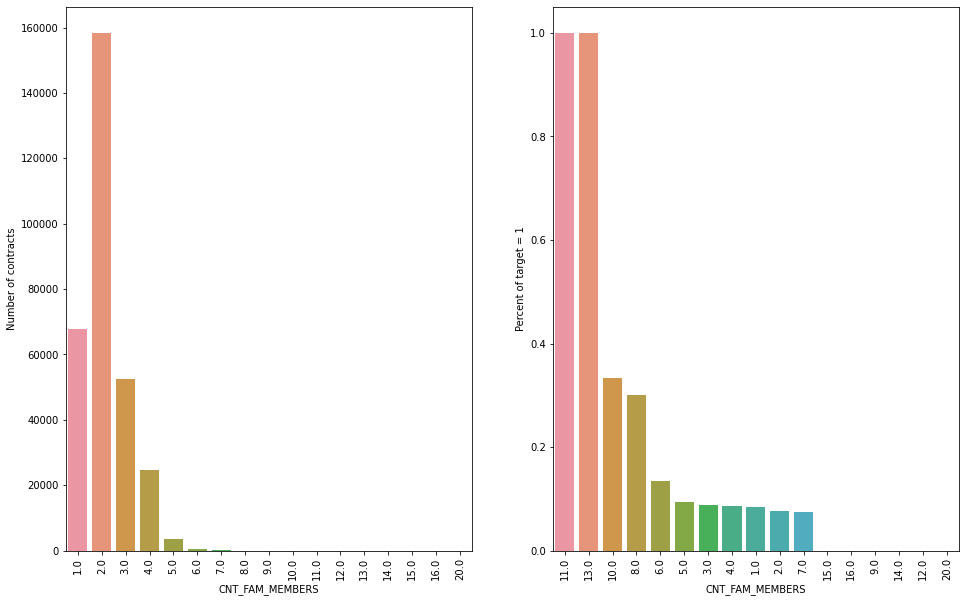

In [15]:
plot_stat('CNT_FAM_MEMBERS',True)

Since most of the clients are married, family size of 2 take the largest portion of the figure. <br>
From the 2nd figure, the more family memner the client has, the higher chance they would not repay the loan.

**Income type of client**

       NAME_INCOME_TYPE  Number of contracts
0               Working               158774
1  Commercial associate                71617
2             Pensioner                55362
3         State servant                21703
4            Unemployed                   22
5               Student                   18
6           Businessman                   10
7       Maternity leave                    5


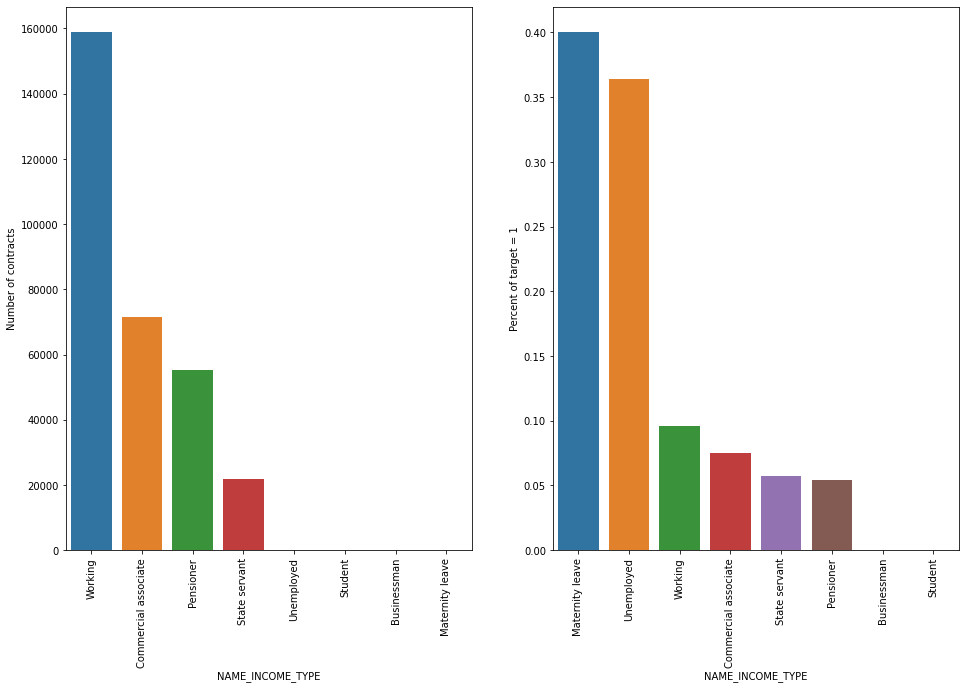

In [16]:
plot_stat('NAME_INCOME_TYPE', True)

Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner,...<br>
The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

**Ocupation of client**

          OCCUPATION_TYPE  Number of contracts
0                Laborers                55186
1             Sales staff                32102
2              Core staff                27570
3                Managers                21371
4                 Drivers                18603
5   High skill tech staff                11380
6             Accountants                 9813
7          Medicine staff                 8537
8          Security staff                 6721
9           Cooking staff                 5946
10         Cleaning staff                 4653
11  Private service staff                 2652
12     Low-skill Laborers                 2093
13   Waiters/barmen staff                 1348
14            Secretaries                 1305
15          Realty agents                  751
16               HR staff                  563
17               IT staff                  526


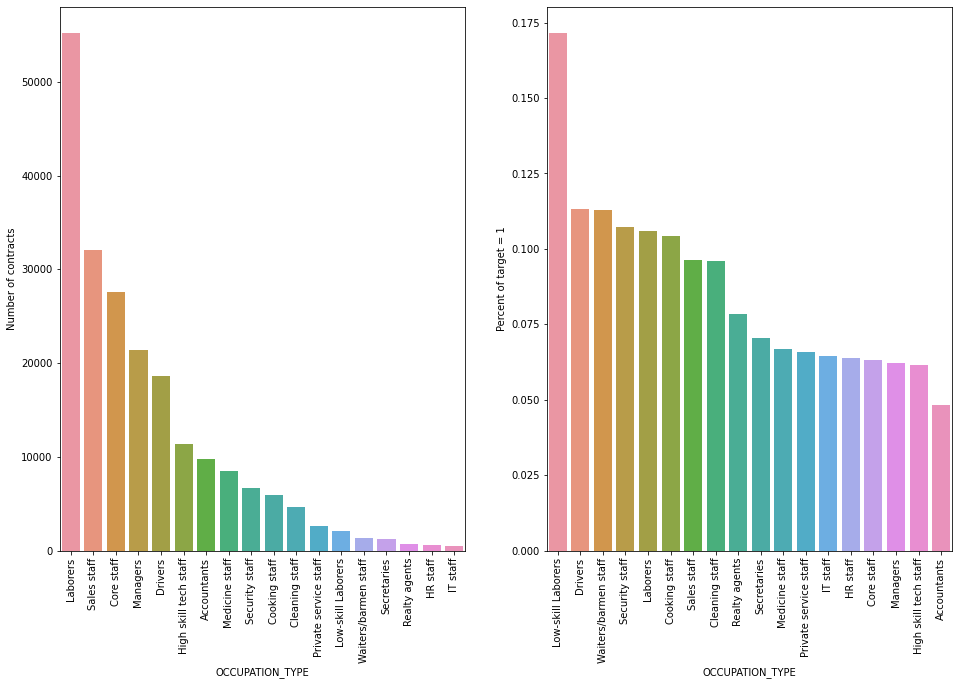

In [17]:
plot_stat('OCCUPATION_TYPE',True)

Most of the applicants are laborers, and with those who are low-skill, they have a higher rate of not repaying the loans (17%)

**Organization type**

         ORGANIZATION_TYPE  Number of contracts
0   Business Entity Type 3                67992
1                      XNA                55374
2            Self-employed                38412
3                    Other                16683
4                 Medicine                11193
5   Business Entity Type 2                10553
6               Government                10404
7                   School                 8893
8            Trade: type 7                 7831
9             Kindergarten                 6880
10            Construction                 6721
11  Business Entity Type 1                 5984
12       Transport: type 4                 5398
13           Trade: type 3                 3492
14        Industry: type 9                 3368
15        Industry: type 3                 3278
16                Security                 3247
17                 Housing                 2958
18       Industry: type 11                 2704
19                Military              

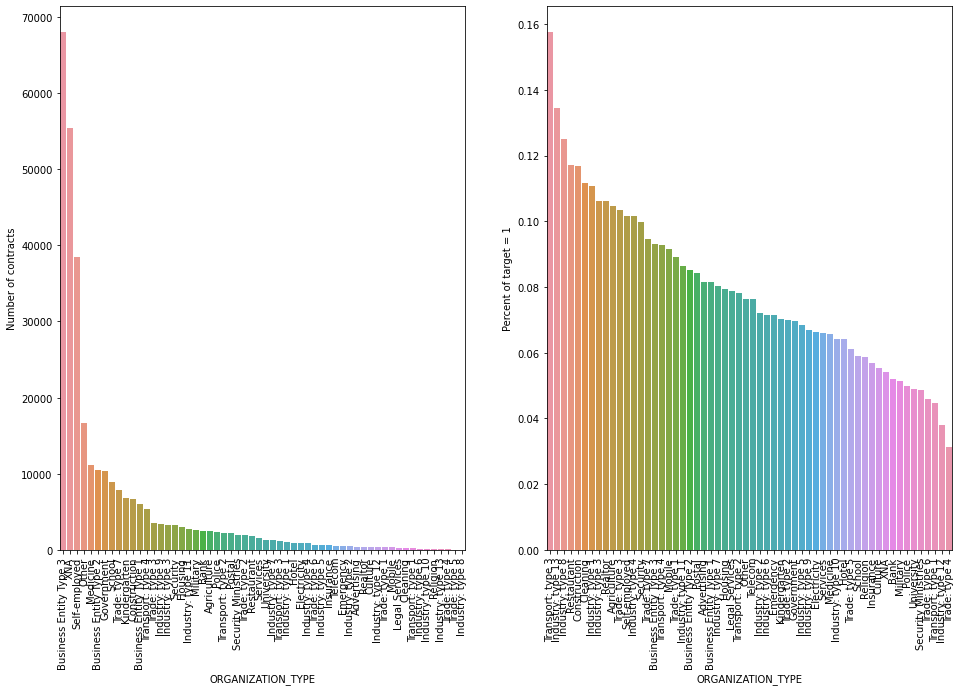

In [18]:
plot_stat('ORGANIZATION_TYPE',True)

Business entity took up a large sum of total clients.<br>
Transport type, Industry type 3, 8 are those types who has a high rate of not repaying loans.

**Education type of the client**

             NAME_EDUCATION_TYPE  Number of contracts
0  Secondary / secondary special               218391
1               Higher education                74863
2              Incomplete higher                10277
3                Lower secondary                 3816
4                Academic degree                  164


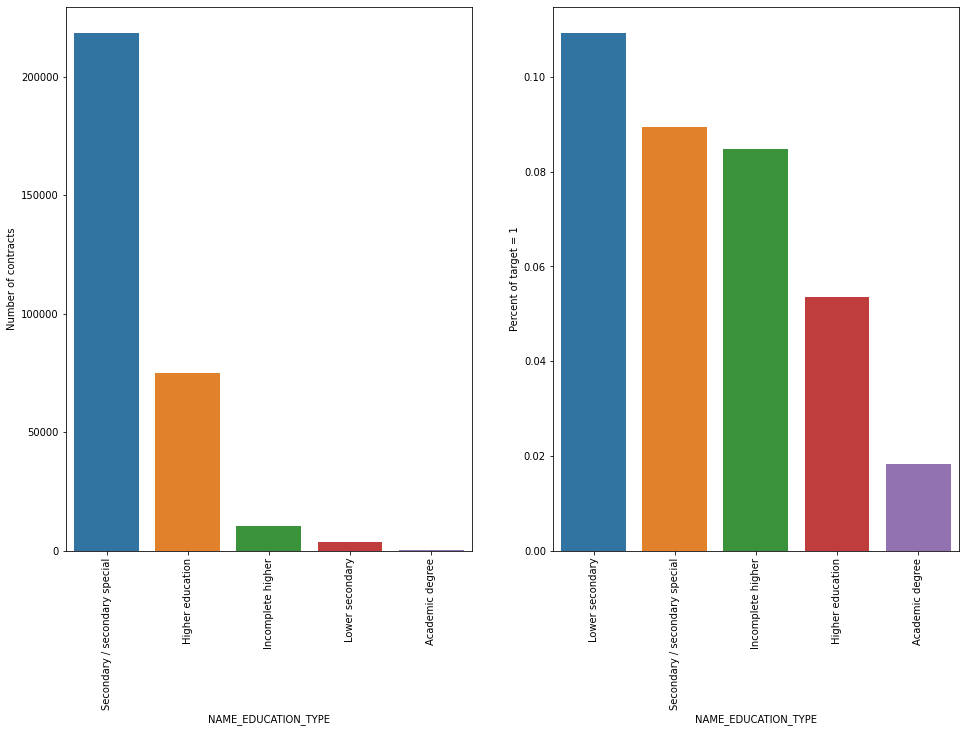

In [19]:
plot_stat('NAME_EDUCATION_TYPE',True)

Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.

The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.

**Type of the housing of client**

     NAME_HOUSING_TYPE  Number of contracts
0    House / apartment               272868
1         With parents                14840
2  Municipal apartment                11183
3     Rented apartment                 4881
4     Office apartment                 2617
5      Co-op apartment                 1122


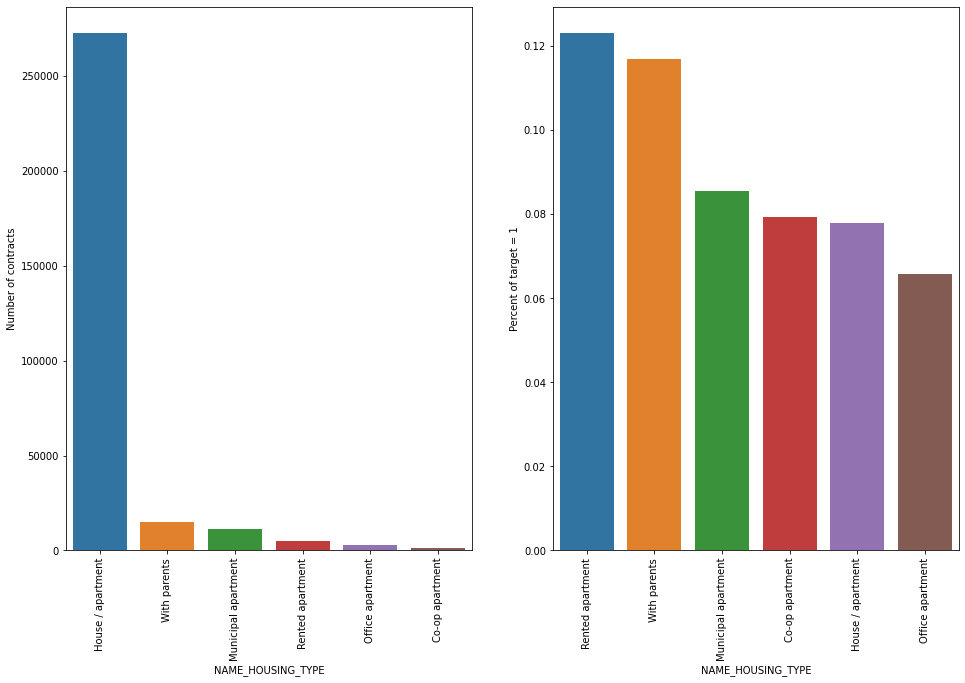

In [20]:
plot_stat('NAME_HOUSING_TYPE',True)

Most clients live in their own house/apartments.<br>
Those who lives in a rented one or depend on their parents has a rate of 12% for not repaying loans, while the others are around 10%.

**Total income distribution**

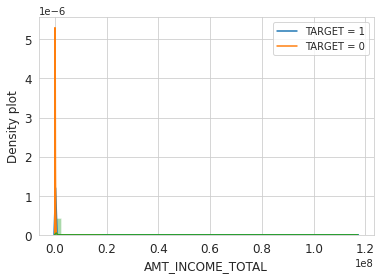

In [21]:
plot_dist('AMT_INCOME_TOTAL')

**Credit distribution**

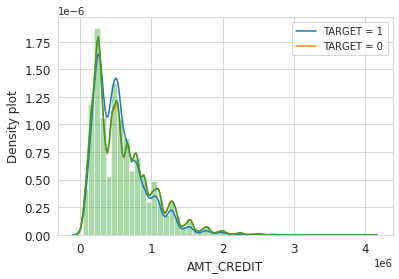

In [22]:
plot_dist('AMT_CREDIT')

**Annuity distribution**

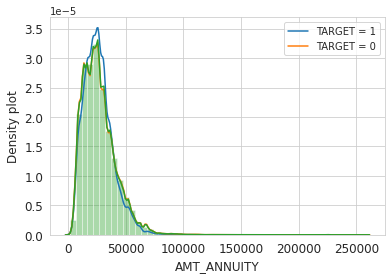

In [23]:
plot_dist('AMT_ANNUITY')

**Goods price**

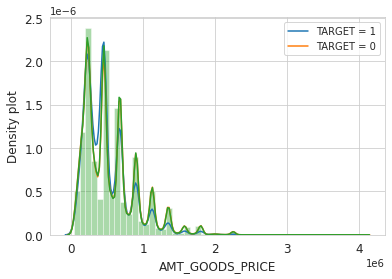

In [24]:
plot_dist('AMT_GOODS_PRICE')

**Days from birth distribution**

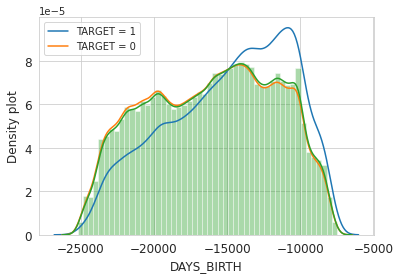

In [25]:
plot_dist('DAYS_BIRTH')

**Days employed distribution**

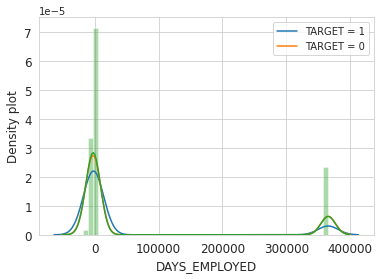

In [26]:
plot_dist('DAYS_EMPLOYED')

**Days of registration distribution**

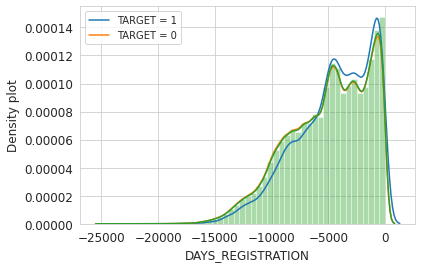

In [27]:
plot_dist('DAYS_REGISTRATION')

**Days ID publish distribution**

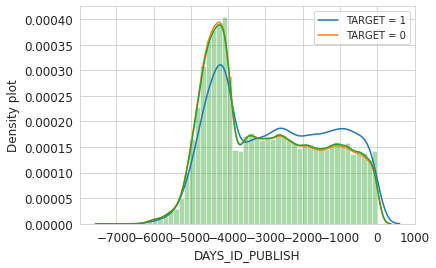

In [28]:
plot_dist('DAYS_ID_PUBLISH')

**Region registered not live region**

   REG_REGION_NOT_LIVE_REGION  Number of contracts
0                           0               302854
1                           1                 4657


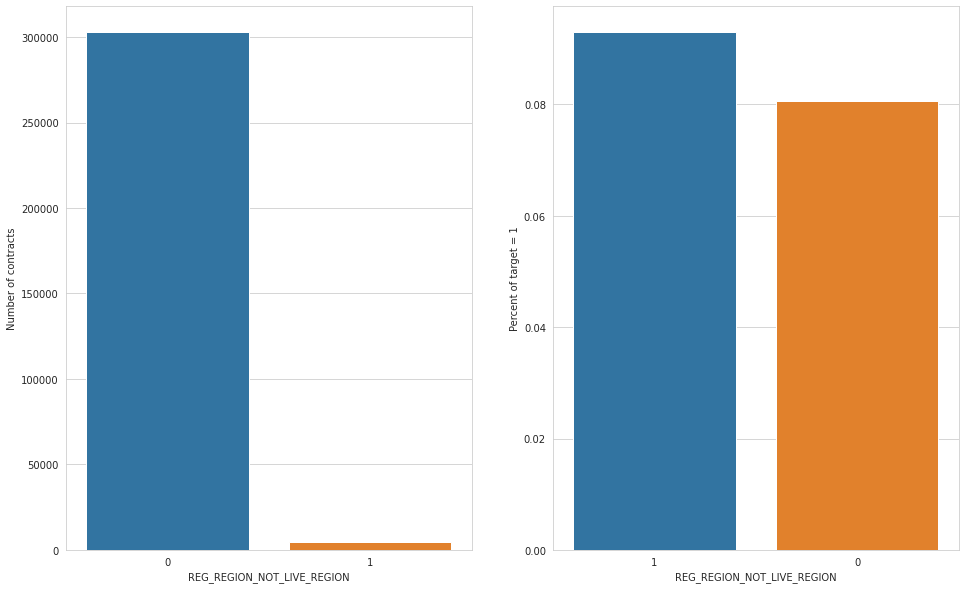

In [29]:
plot_stat('REG_REGION_NOT_LIVE_REGION')

**Region registered not work region**

   REG_REGION_NOT_WORK_REGION  Number of contracts
0                           0               291899
1                           1                15612


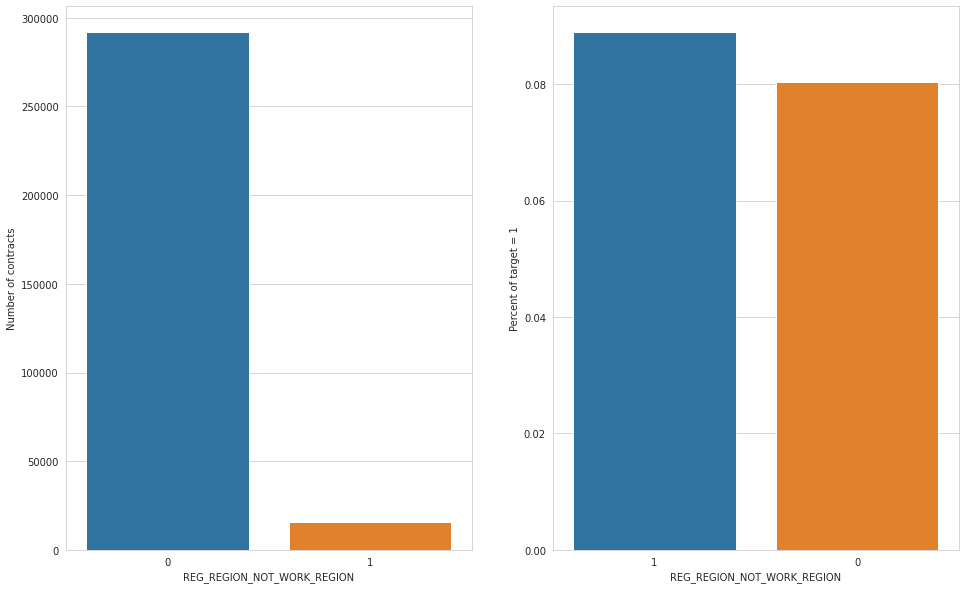

In [30]:
plot_stat('REG_REGION_NOT_WORK_REGION')

**City registered not live city**

   REG_CITY_NOT_LIVE_CITY  Number of contracts
0                       0               283472
1                       1                24039


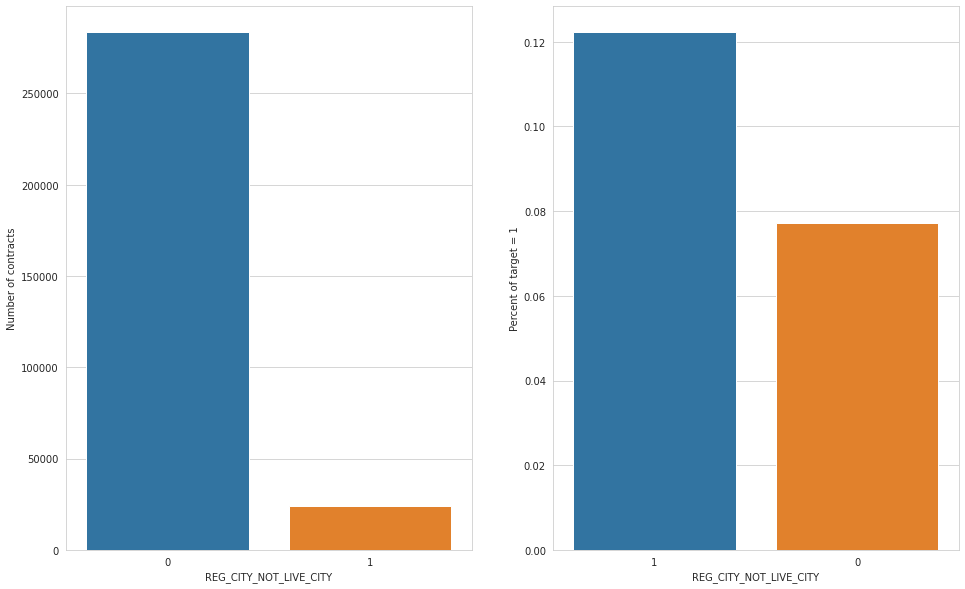

In [31]:
plot_stat('REG_CITY_NOT_LIVE_CITY')

**City registered not work city**

   REG_CITY_NOT_WORK_CITY  Number of contracts
0                       0               236644
1                       1                70867


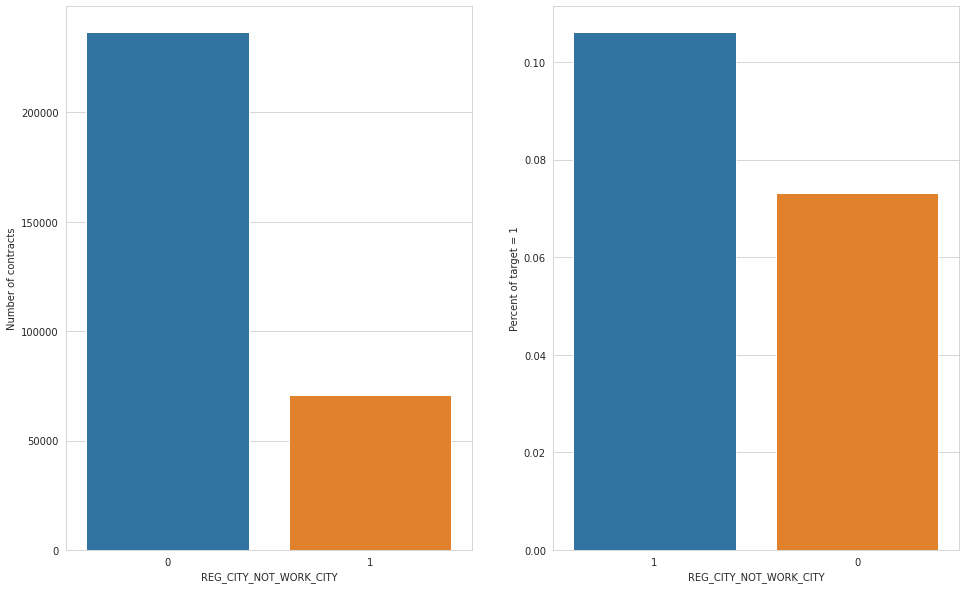

In [32]:
plot_stat('REG_CITY_NOT_WORK_CITY')